Accuracy of K-Means= 0.24
Accuracy of GMM is = 0.0
Observation: The K-Means matched the true labels more closely than the GMM using EM algorithm based clustering.


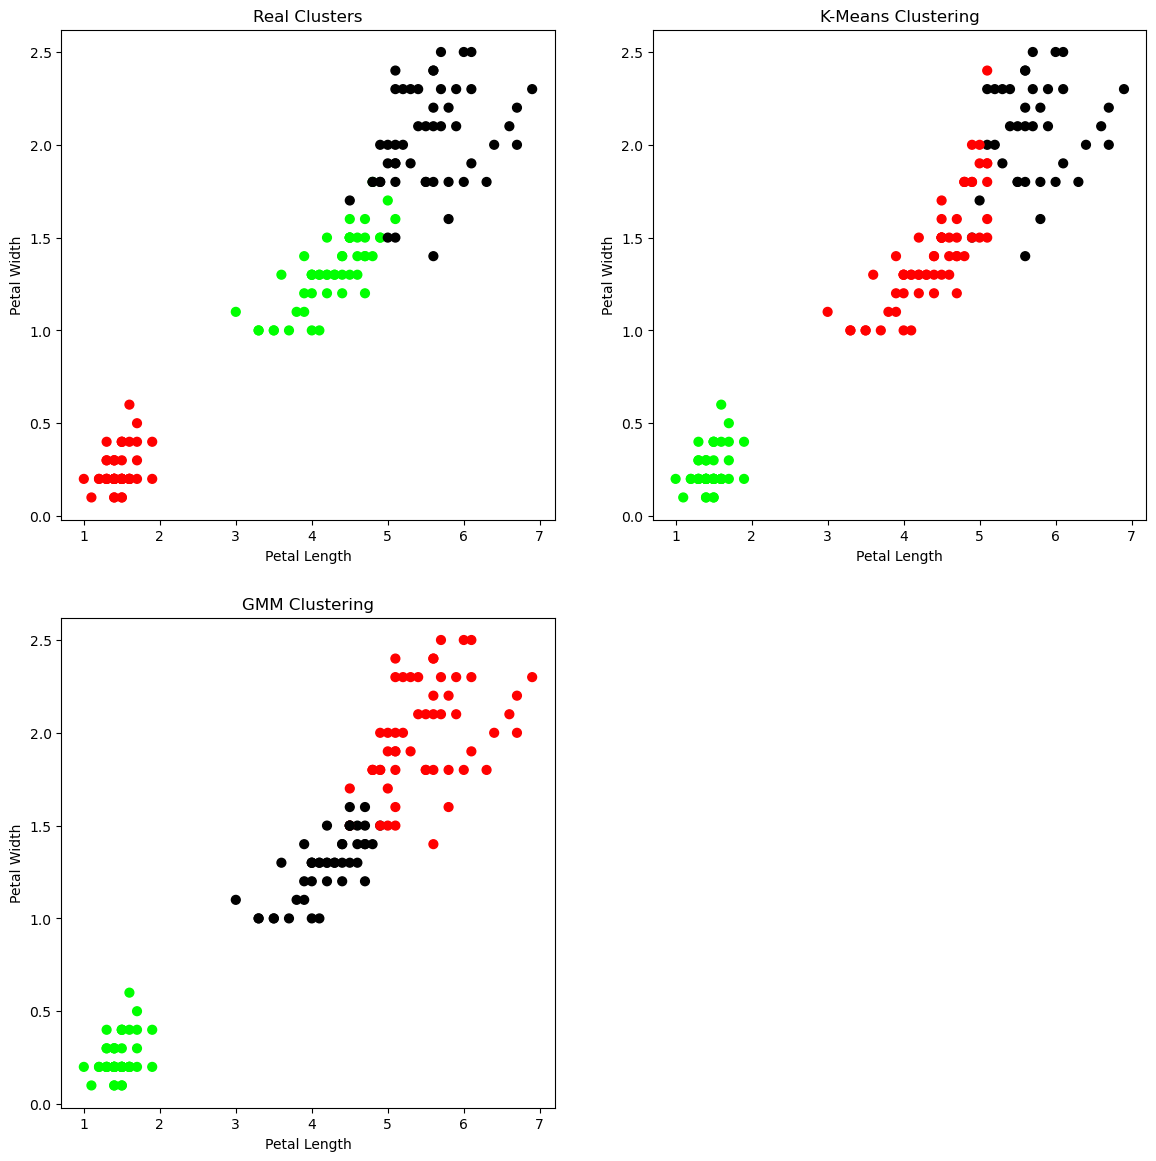

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)
score1 = sm.accuracy_score(y, model.labels_)
print("Accuracy of K-Means=", score1)

plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
score2 = sm.accuracy_score(y, gmm_y)
print("Accuracy of GMM is =", score2)

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

if(score1>score2):
    print('Observation: The K-Means matched the true labels more closely than the GMM using EM algorithm based clustering.')
else:
    print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')